# Mushroom Dataset
**Author:** Brett Neely

**Date:** April 4, 2025  

**Introduction:** The purpose of this notebook is to use model(s) to predict poisonous vs. edible from the Mushroom dataset. The features odor and bruises are chosen for feature selection to train the model. The models utilized in this analysis are:
- Random Forest
- Support Vector Machine

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

### Section 1: Import The Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

In [3]:
columns = [
        "poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
        "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
        "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
        "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
        "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

In [4]:
# Load the dataset into a dataframe
df = pd.read_csv(url, header=None, names=columns)

In [5]:
# Display the first 10 rows
df.head(10)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [6]:
# Display summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Section 1 Reflection

This dataset has 8124 records with 22 features. All features have values as there are no nulls. The data itself uses letters as indicators for their given feature. For example in the "poisonous" feature, the values always 'p' for poisonous or 'e' for edible.

### Section 2: Data Exploration and Preparation
#### 2.1 Explore Data Patterns and Distributions

Create visualizations for the data for a deeper understanding.

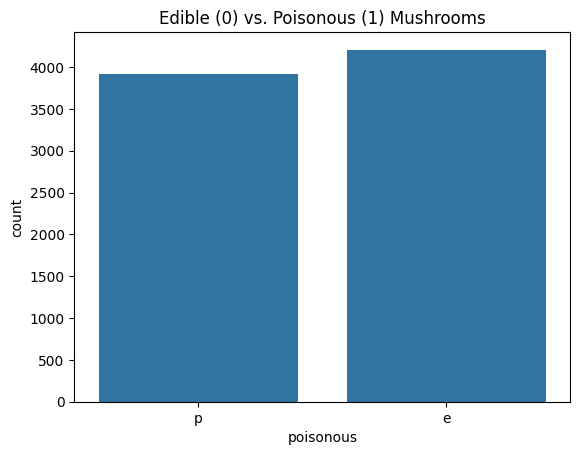

In [7]:
# Plot a countplot for Poisonous vs. Edible

sns.countplot(data=df, x='poisonous')
plt.title('Edible (0) vs. Poisonous (1) Mushrooms')
plt.show()

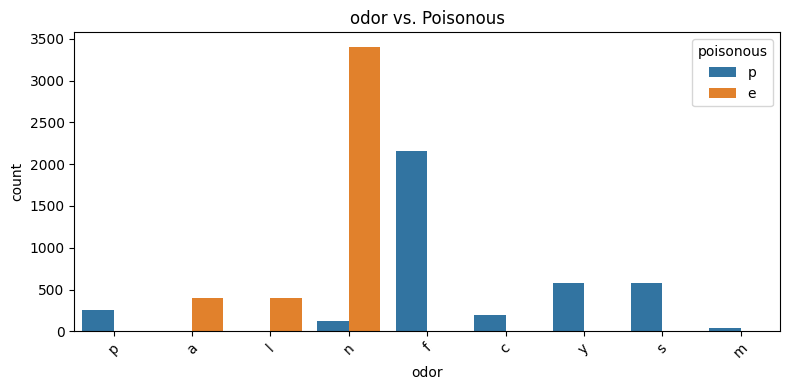

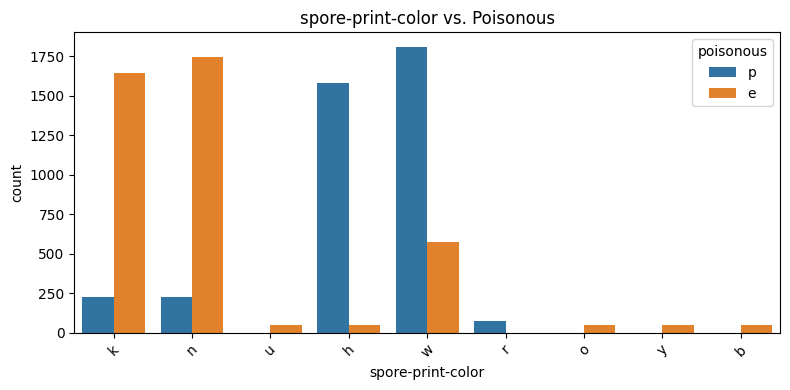

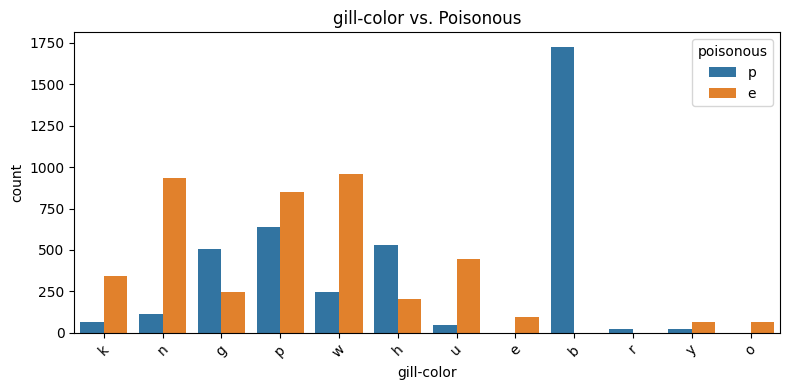

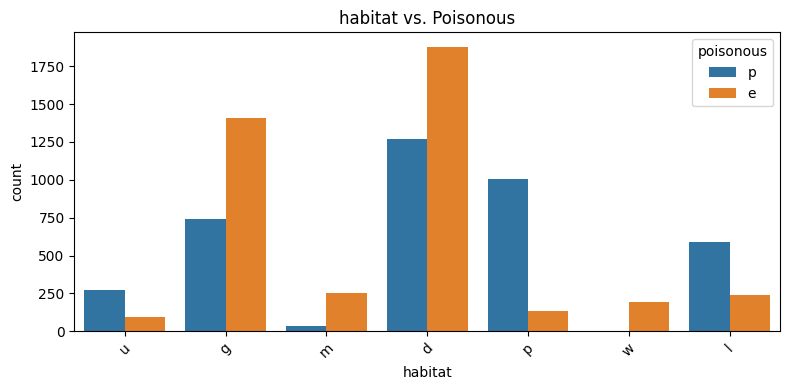

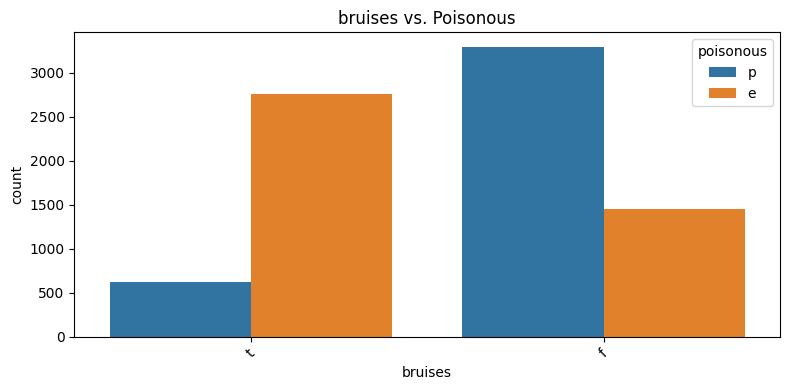

In [8]:
# Loop through some different features and visualize poisonous vs. edible

important_features = ['odor', 'spore-print-color', 'gill-color', 'habitat', 'bruises']

for feature in important_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='poisonous')
    plt.title(f'{feature} vs. Poisonous')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### 2.2 Feature Engineering

In [9]:
# Check columns that may only have one value
df.nunique()

poisonous                    2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [10]:
# Drop veil-type since it only has 1 unique value
df = df.drop(columns=['veil-type'])

In [11]:
# Encode Categorical Variables (all columns in this dataset are categorical)
df_encoded = df.apply(lambda col: col.astype('category').cat.codes)

### Section 3: Feature Selection and Justification
#### 3.1 Choose Features and Target

In [12]:
# Choose two features for predicting poisonous: odor and bruises
X = df_encoded[['odor', 'bruises']]
y = df_encoded['poisonous']

#### Section 3 Reflection

These features were chosen because of initial viewing of the countplots. It appears these two will make good predictors for poisonous.

### Section 4: Train a Model (Random Forest)
#### 4.1 Split the data

In [13]:
# Use 80/20 split for training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### 4.2 Train the model

In [14]:
# Train the model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=32
)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

#### 4.3 Evaluate performance

In [16]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))

Confusion Matrix:
[[842   0]
 [ 23 760]]

Classification Report:
              precision    recall  f1-score   support

      Edible       0.97      1.00      0.99       842
   Poisonous       1.00      0.97      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



#### Section 4 Reflection

Inspecting the classification report, Random Forest model performed exrtemely well with an f1-score with 0.99 (almost 100%). When predicting poisonous, the model is 100% correct (precision). When predicting edible, the model is 97% (precision).

### Section 5: Compare Alternative Model
#### 5.1 Support Vector Machine
Compare an alternative model for prediction.

In [17]:
svc = SVC(random_state=42)

svc.fit(X_train, y_train)

SVC(random_state=42)

In [18]:
# Make predictions
y_pred_svc = svc.predict(X_test)

In [19]:
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svc, target_names=['Edible', 'Poisonous']))

Classification Report (SVM):
              precision    recall  f1-score   support

      Edible       0.96      1.00      0.98       842
   Poisonous       1.00      0.96      0.98       783

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



#### Section 5 Reflection

The Support Vector Machine is also 100% accurate for predicting poisonous, but only 96% accurate for predicting edible. Because of this, the Random Forest Model performed better, but only slightly. It makes sense that Random Forest performed better because it is designed to work well against non-linear relationships.

### Section 6: Final Thoughts & Insights
Both models (Random Forest and Support Vector Machine) performed well against the features: odor and bruises. There were minimal challenges faced as the model performance was straightforward and there were was not much data cleaning necessary from this dataset. Further analysis could include model training with additional features to predict poisonous.